# 第4章 拡散方程式

# 4.2 1次元熱伝導（拡散）方程式

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def init(jmax):
    x = np.linspace(0, 1, jmax)
    q = np.sin(np.pi * x)
    return (x, q)

In [8]:
def do_computing(x, q, a, dt, dx, nmax, interval = 2):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ
    
    # 初期分布
    plt.plot(x, q, marker='o', lw=2, label='n = 0') 
    
    for n in range(1, nmax + 1):
        qold = q.copy()
        
        for j in range(1, jmax - 1):
            dq = a * dt * (qold[j+1] - 2.0 * qold[j] + qold[j-1]) / (dx ** 2) # 式(4.6)
            q[j] = qold[j] + dq

        # 境界条件
        q[0] = 0
        q[-1] = 0
        
        # 各ステップの可視化
        if n % interval == 0:
            plt.plot(x, q, marker='o', lw=2, label=f'n = {n}')

    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlim([0, 1])
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend()
    plt.show()

In [9]:
jmax = 11
nmax = 12

# a * dt / dx ** 2 <= 0.5 でなければならない
a = 2
dt = 0.01
dx = 0.2

x, q = init(jmax)

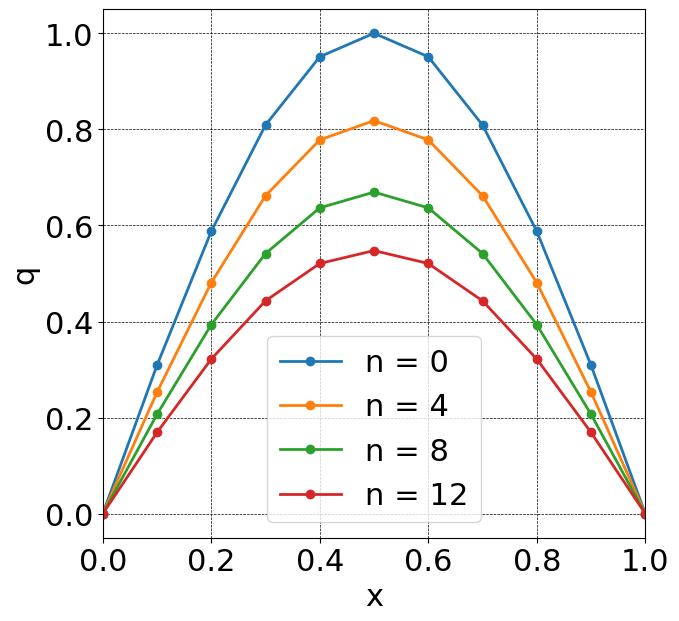

In [10]:
do_computing(x, q, a, dt, dx, nmax, interval = 4)